In [1]:
try:
    '''
    NOTE: On intel machines, sklearn-intelex should be
    installed to speed up sklearn quite substantially.
    
    Please see:
    
        https://github.com/intel/scikit-learn-intelex
    '''
    
    from sklearnex import patch_sklearn
    patch_sklearn(verbose = False)
except:
    pass

import numpy as np
import pandas as pd
import mne
import os
import auxiliary as aux
import data, rsa

import sys
sys.path.append('../../spaces/')
import pubplot as pub
import embeddings as emb
pub.styles.set()
C = pub.colours.equidistant('tab20c', k = 20)

import matplotlib.pyplot as plt

import gzip, pickle

## Supplementary Figure 5-8, Tables 5-8
This notebook produces supplementary results for representational similarity analyses.

In [2]:
Rr_a = []
Xr_a = []
Rr_s = []
Xr_s = []

for i, sub in enumerate(data.Subjects.trim()):
    dir_out = f'./data/processed/eeg/sub{sub.sid}/'
    
    with gzip.open(f'{dir_out}rec-enc-b0-m0-c0-a1-s0-k5-m-1.pkl.gz', 'rb') as f:
        (ß_i, ß_r_i, oos_r_i) = pickle.load(f)
    Rr_a.append(oos_r_i)
    
    with gzip.open(f'{dir_out}rec-encran-b0-m0-c0-a1-s0-k5-m-1.pkl.gz', 'rb') as f:
        (ß_i, ß_r_i, oos_r_i) = pickle.load(f)
    Xr_a.append(oos_r_i)
    
    with gzip.open(f'{dir_out}rec-enc-b0-m0-c0-a0-s1-k5-m-1.pkl.gz', 'rb') as f:
        (ß_i, ß_r_i, oos_r_i) = pickle.load(f)
    Rr_s.append(oos_r_i)
    
    with gzip.open(f'{dir_out}rec-encran-b0-m0-c0-a0-s1-k5-m-1.pkl.gz', 'rb') as f:
        (ß_i, ß_r_i, oos_r_i) = pickle.load(f)
    Xr_s.append(oos_r_i)
        
bsl = np.array([
    np.array(Rr_a)[:,0], 
    np.array(Xr_a)[:,0],
    np.array(Rr_s)[:,0],
    np.array(Xr_s)[:,0]
]).mean(0)
Rr_a = np.array(Rr_a)[:,[0,2,1,3]][:,1:]
Xr_a = np.array(Xr_a)[:,[0,2,1,3]][:,1:]
Rr_s = np.array(Rr_s)[:,[0,2,1,3]][:,1:]
Xr_s = np.array(Xr_s)[:,[0,2,1,3]][:,1:]

In [3]:
Rr_a.shape, Xr_a.shape, Rr_s.shape, Xr_s.shape

((35, 3), (35, 3), (35, 3), (35, 3))

/var/folders/b4/qysvl6jd4995kp_qql3yj3880000gn/T/ipykernel_71763/3605620068.py:56: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, text in zip(leg.legendHandles, leg.texts):


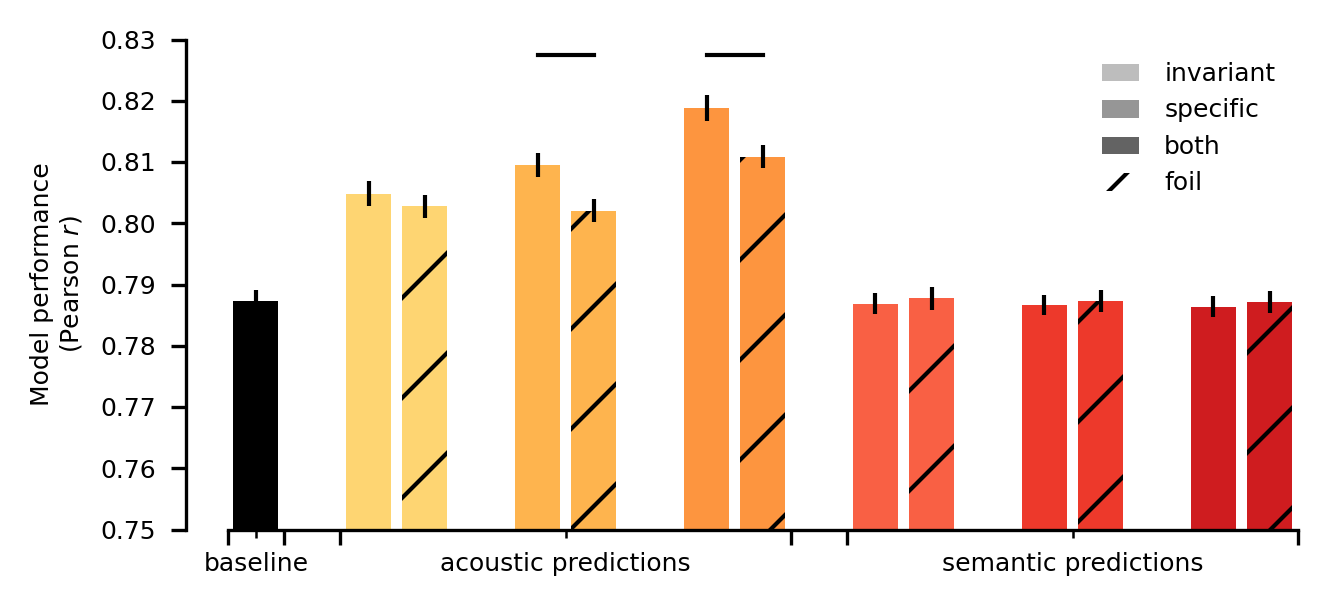

In [5]:
'''
Figure 6
'''

import scipy

fig, ax = pub.figure(figsize = (4.4, 2.0))

C1 = pub.colours.equidistant('YlOrRd', k = 20)
C2 = pub.colours.equidistant('Reds', k = 20)
C3 = pub.colours.equidistant('Oranges', k = 20)
cols_inv = [C1[5], C2[10], C3[10]]
cols_spc = [C1[7], C2[12], C3[12]]
cols_bot = [C1[9], C2[14], C3[14]]

col_i = 'black'
x = bsl
se = x[np.random.choice(np.arange(x.shape[0]), replace = True, size = (1000, x.shape[0]))].mean(1).std(0)
ax.bar(0, x.mean(), yerr = se, color = col_i)

for i in range(3):
    col_i = [cols_inv[0], cols_spc[0], cols_bot[0]][i]
    x = Rr_a[:,i]
    se = x[np.random.choice(np.arange(x.shape[0]), replace = True, size = (1000, x.shape[0]))].mean(1).std(0)
    ax.bar(2 + i * 3, x.mean(), yerr = se, color = col_i)
    
    x = Xr_a[:,i]
    se = x[np.random.choice(np.arange(x.shape[0]), replace = True, size = (1000, x.shape[0]))].mean(1).std(0)
    ax.bar(2 + i * 3 + 1, x.mean(), yerr = se, color = col_i, hatch = '/')

for i in range(3):
    col_i = [cols_inv[1], cols_spc[1], cols_bot[1]][i]
    x = Rr_s[:,i]
    se = x[np.random.choice(np.arange(x.shape[0]), replace = True, size = (1000, x.shape[0]))].mean(1).std(0)
    ax.bar(2 + 9 + i * 3, x.mean(), yerr = se, color = col_i)
    
    x = Xr_s[:,i]
    se = x[np.random.choice(np.arange(x.shape[0]), replace = True, size = (1000, x.shape[0]))].mean(1).std(0)
    ax.bar(2 + 9 + i * 3 + 1, x.mean(), yerr = se, color = col_i, hatch = '/')

ax.set_ylim([0.75, 0.83])
ax.set_xticks([0, 5.5, 14.5], minor = True)
ax.set_xticklabels(['baseline', 'acoustic predictions', 'semantic predictions'], minor = True)
ax.set_xticks([-0.5, 0.5, 1.5, 9.5, 10.5, 18.5], minor = False, labels = [])
ax.set_xlim([-0.5, 18.5])
ax.set_ylabel('Model performance\n' + r'(Pearson $r$)')

ax.spines['left'].set_position(('data', -1.25))

ax.bar(-1, 0.0, color = C[18], label = 'invariant')
ax.bar(-1, 0.0, color = C[17], label = 'specific')
ax.bar(-1, 0.0, color = C[16], label = 'both')
ax.bar(-1, 0.0, color = 'None', label = 'foil')

leg = pub.cosmetics.legend(ax = ax, loc = 'upper right')
for handle, text in zip(leg.legendHandles, leg.texts):
    if text.get_text() == "foil":
        handle.set_hatch("///")

labels = ['ac.inv.', 'ac.spc', 'ac.both', 'sem.inv.', 'sem.spc', 'sem.both']
contrasts = []
tests = []
df = []
tv = []
cohensd = []
ps = []
mu = []
sd = []
se = []
lb, ub = [], []
pct_mu = []
pct_sd = []
pct_se = []
pct_lb, pct_ub = [], []

for i in range(3):
    contrasts.append(f'{labels[i]}: true-foil')
    test = scipy.stats.ttest_rel(Rr_a[:,i], Xr_a[:,i])
    tests.append(test)
    df.append(test.df)
    tv.append(test.statistic)
    cohensd.append(rsa.stats.cohens_d(Rr_a[:,i], Xr_a[:,i], paired = True).squeeze())
    ps.append(test.pvalue)
    
    diff = Rr_a[:,i] - Xr_a[:,i]
    se_i = rsa.stats.bootstrap_se(diff)
    mu.append(diff.mean())
    sd.append(diff.std())
    se.append(se_i)
    lb.append(diff.mean() - 1.96 * se_i)
    ub.append(diff.mean() + 1.96 * se_i)
    
    diff = ((Rr_a[:,i] / Xr_a[:,i]) - 1) * 100
    se_i = rsa.stats.bootstrap_se(diff)
    pct_mu.append(diff.mean())
    pct_sd.append(diff.std())
    pct_se.append(se_i)
    pct_lb.append(diff.mean() - 1.96 * se_i)
    pct_ub.append(diff.mean() + 1.96 * se_i)

for i in range(3):
    contrasts.append(f'{labels[3+i]}: true-foil')
    test = scipy.stats.ttest_rel(Rr_s[:,i], Xr_s[:,i])
    tests.append(test)
    df.append(test.df)
    tv.append(test.statistic)
    cohensd.append(rsa.stats.cohens_d(Rr_s[:,i], Xr_s[:,i], paired = True).squeeze())
    ps.append(test.pvalue)
    
    diff = Rr_s[:,i] - Xr_s[:,i]
    se_i = rsa.stats.bootstrap_se(diff)
    mu.append(diff.mean())
    sd.append(diff.std())
    se.append(se_i)
    lb.append(diff.mean() - 1.96 * se_i)
    ub.append(diff.mean() + 1.96 * se_i)
    
    diff = ((Rr_s[:,i] / Xr_s[:,i]) - 1) * 100
    se_i = rsa.stats.bootstrap_se(diff)
    pct_mu.append(diff.mean())
    pct_sd.append(diff.std())
    pct_se.append(se_i)
    pct_lb.append(diff.mean() - 1.96 * se_i)
    pct_ub.append(diff.mean() + 1.96 * se_i)

ps_unc = np.array(ps)
ps = rsa.stats.bonferroni_holm(ps_unc)

for i in range(6):
    if ps[i] < .05:
        ax.plot([2 + (i * 3), 2 + (i * 3) + 1], [0.8275, 0.8275], color = 'black')

pub.cosmetics.finish()

fig.savefig(f'./figures/png/suppfig6_crsa-foil.png', dpi = 300)
fig.savefig(f'./figures/svg/suppfig6_crsa-foil.svg')
fig.savefig(f'./figures/pdf/suppfig6_crsa-foil.pdf')

dpi = 300  # any value; inches = pixels / dpi

fig.savefig(
    f'./figures/tiff/suppfig6_crsa-foil.tiff',
    dpi=dpi,
    format="tiff",
    # needs Matplotlib >=3.7 for pil_kwargs
    pil_kwargs={"compression": "tiff_lzw"}  # or "tiff_adobe_deflate", "raw"
)

In [6]:
'''
Table 6
'''

df = {'contrast': contrasts, 'M': mu, 'Std. Dev': sd, 'df': df, 't-value': tv, 'p-value': ps}
df = pd.DataFrame.from_dict(df)
print(df.to_latex(index = False))

\begin{tabular}{lrrrrr}
\toprule
           contrast &         M &  Std. Dev &  df &   t-value &      p-value \\
\midrule
 ac.inv.: true-foil &  0.002073 &  0.007127 &  34 &  1.696327 & 3.958520e-01 \\
  ac.spc: true-foil &  0.007507 &  0.006593 &  34 &  6.638746 & 7.745975e-07 \\
 ac.both: true-foil &  0.007945 &  0.007985 &  34 &  5.801883 & 7.787670e-06 \\
sem.inv.: true-foil & -0.000825 &  0.006090 &  34 & -0.790213 & 1.000000e+00 \\
 sem.spc: true-foil & -0.000710 &  0.006138 &  34 & -0.674545 & 5.045258e-01 \\
sem.both: true-foil & -0.000769 &  0.006059 &  34 & -0.739759 & 9.290471e-01 \\
\bottomrule
\end{tabular}



/var/folders/b4/qysvl6jd4995kp_qql3yj3880000gn/T/ipykernel_71763/242117316.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index = False))


In [7]:
ß = []
ß_r = []
oos_r = []
acc = []
rt = []

for i, sub in enumerate(data.Subjects.trim()):
    dir_out = f'./data/processed/eeg/sub{sub.sid}/'
    
    with gzip.open(f'{dir_out}rec-rdmF-enc-b0-m0-c0-k1-m-1.pkl.gz', 'rb') as f:
        (ß_i, ß_r_i, oos_r_i) = pickle.load(f)

    ß.append(ß_i)
    ß_r.append(ß_r_i)
    oos_r.append(oos_r_i)

    df = pd.read_csv(f'./data/raw/beh/sub{sub.sid}/{sub.pid}.csv')
    df = df.loc[df.type == data.defs.TRIAL_MT_MAIN].reset_index(drop = True)
    rt.append(
        np.mean(df.loc[pd.isna(df.rt) == False].rt.tolist())
    )
    acc.append(
        np.mean(df.correct.tolist())
    )

ß = np.array(ß)
ß_r = np.array(ß_r)
oos_r = np.array(oos_r)
rt = np.array(rt)
acc = np.array(acc)

/var/folders/b4/qysvl6jd4995kp_qql3yj3880000gn/T/ipykernel_71763/371487939.py:235: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, text in zip(leg.legendHandles, leg.texts):


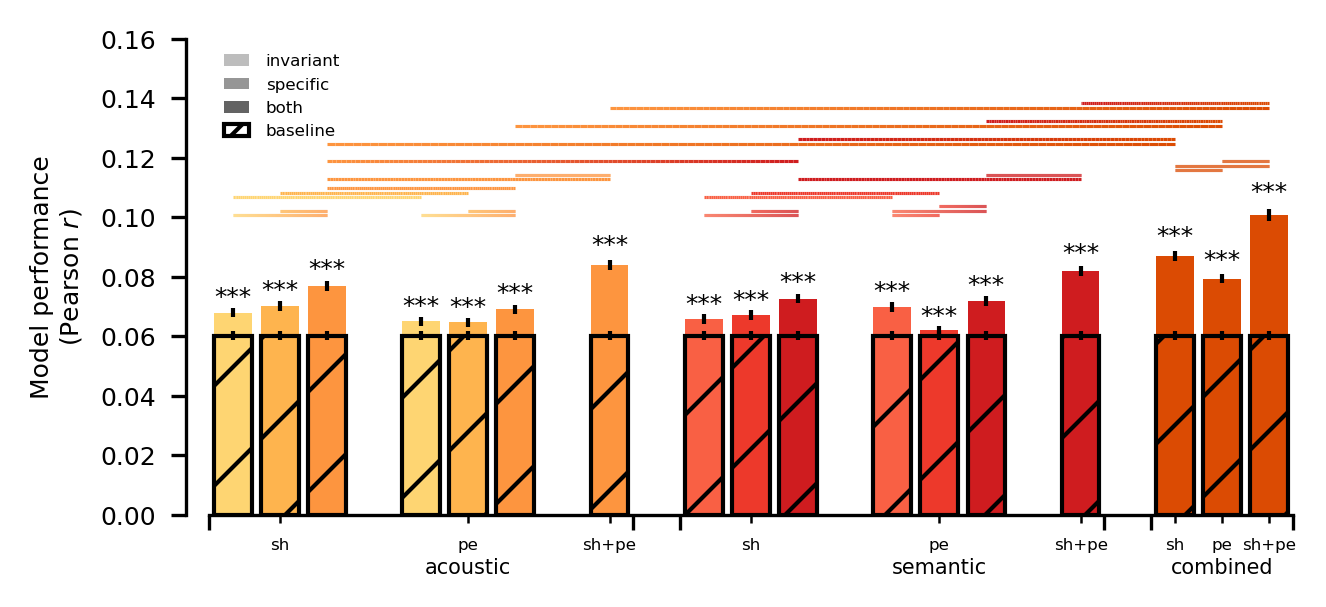

In [8]:
'''
Figure 7
'''

import matplotlib.collections as mcoll

C1 = pub.colours.equidistant('YlOrRd', k = 20)
C2 = pub.colours.equidistant('Reds', k = 20)
C3 = pub.colours.equidistant('Oranges', k = 20)
cols_inv = [C1[5], C2[10], C3[10]]
cols_spc = [C1[7], C2[12], C3[12]]
cols_bot = [C1[9], C2[14], C3[14]]

# set labels
labs = [
    'baseline',
    'acc.inv. (sh)',
    'acc.spc. (sh)',
    'acc.bth. (sh)',
    'acc.inv. (pe)',
    'acc.spc. (pe)',
    'acc.bth. (pe)',
    'acc.bth. (sh+pe)',
    'sem.inv. (sh)',
    'sem.spc. (sh)',
    'sem.bth. (sh)',
    'sem.inv. (pe)',
    'sem.spc. (pe)',
    'sem.bth. (pe)',
    'sem.bth. (sh+pe)',
    'acc.sem. (sh)',
    'acc.sem. (pe)',
    'acc.sem. (sh+pe)'
]

# add baseline tests
tests = [(0, i) for i in range(1, oos_r.shape[1])]
tests += [
    # within acc.sh.
    0,
    (1, 2), (1, 3), (2, 3),
    # within acc.pe.,
    0,
    (4, 5), (4, 6), (5, 6),
    # between acc.sh.acc.pe.,
    4,
    (1, 4), (2, 5), (3, 6),
    # between acc.sh both,
    8,
    (3, 7), (6, 7),
    
    # within sem.sh.
    0,
    (8, 9), (8, 10), (9, 10),
    # within sem.pe.,
    0,
    (11, 12), (11, 13), (12, 13),
    # between sem.sh.sem.pe.,
    4,
    (8, 11), (9, 12), (10, 13),
    # between sem.sh both,
    8,
    (10, 14), (13, 14),
    
    # acoustic v sem (sh & pe)
    12,
    (3, 10), (6, 13),
    # acoustic v sem (all)
    (7, 14),
    
    # combined sharpening
    16,
    (3, 15), (10, 15),
    
    # combined pe
    20,
    (6, 16), (13, 16),
    
    # within combined
    10,
    (15, 16), (15, 17), (16, 17),
    
    # full vs. partials
    24,
    (7, 17), (14, 17)
]

'''
    
    '''

# set colours
colours = [
    cols_inv[0], cols_spc[0], cols_bot[0],
    cols_inv[0], cols_spc[0], cols_bot[0],
    cols_bot[0],
    cols_inv[1], cols_spc[1], cols_bot[1],
    cols_inv[1], cols_spc[1], cols_bot[1],
    cols_bot[1],
    cols_bot[2], cols_bot[2], cols_bot[2]
]

# set placement
placement = [
    0, 1, 2, 
    4, 5, 6,
    8,
    10, 11, 12,
    14, 15, 16,
    18,
    20, 21, 22
]

# setup sig maxes
vmax = oos_r.mean(-1).mean(0).max()
steps = 0.0015
sigs = 0

# setup baseline
base_mu = oos_r[:,0,:].mean()
base_se = oos_r[:,0,:].mean(-1)[np.random.choice(np.arange(oos_r.shape[0]), replace = True, size = (1000, oos_r.shape[0]))]
base_se = base_se.mean(-1).std(0)

# setup figure
fig, ax = pub.figure(figsize = (4.4, 2.0))

# bars
for i in range(1, oos_r.shape[1]):
    subs = oos_r[:,i].mean(-1)

    mu = subs.mean()
    se = subs[np.random.choice(np.arange(subs.shape[0]), replace = True, size = (1000, subs.shape[0]))]
    se = se.mean(-1).std(0)
    x_coord = placement[i - 1]
    col_i = colours[i - 1]
    
    ax.bar(x_coord, mu, color = col_i)
    ax.errorbar(x_coord , mu, yerr = se, color = 'black')

    ax.bar(x_coord, base_mu, color = 'None', hatch = '/', edgecolor = 'black')
    ax.errorbar(x_coord , base_mu, yerr = base_se, color = 'black')

contrasts = []
t_tests = []
df = []
tv = []
cohensd = []
ps = []
mu = []
sd = []
se = []
lb, ub = [], []
pct_mu = []
pct_sd = []
pct_se = []
pct_lb, pct_ub = [], []

for i, test in enumerate(tests):
    if isinstance(test, int) or isinstance(test, np.ndarray): continue
    
    j, k = test
    
    contrasts.append(f'{labs[j]}-{labs[k]}')
    test = scipy.stats.ttest_rel(oos_r[:,j].mean(-1), oos_r[:,k].mean(-1))
    t_tests.append(test)
    df.append(test.df)
    tv.append(test.statistic)
    cohensd.append(rsa.stats.cohens_d(oos_r[:,j].mean(-1), oos_r[:,k].mean(-1), paired = True).squeeze())
    ps.append(test.pvalue)
                   
    diff = oos_r[:,j].mean(-1) - oos_r[:,k].mean(-1)
    se_i = rsa.stats.bootstrap_se(diff)
    mu.append(diff.mean())
    sd.append(diff.std())
    se.append(se_i)
    lb.append(diff.mean() - 1.96 * se_i)
    ub.append(diff.mean() + 1.96 * se_i)
    
    diff = ((oos_r[:,j].mean(-1) / oos_r[:,k].mean(-1)) - 1) * 100
    se_i = rsa.stats.bootstrap_se(diff)
    pct_mu.append(diff.mean())
    pct_sd.append(diff.std())
    pct_se.append(se_i)
    pct_lb.append(diff.mean() - 1.96 * se_i)
    pct_ub.append(diff.mean() + 1.96 * se_i)

ps_unc = np.array(ps)
ps = rsa.stats.bonferroni_holm(ps_unc)

i_c = 0
for i, test in enumerate(tests):
    if isinstance(test, int):
        sigs = test
        i_c += 1
        continue
    
    j, k = test
    p = ps[i - i_c]

    if 0 in [j, k]:
        k = max(j, k)
        coord_x = placement[k - 1]
        
        sig = '***' if p < 1e-3 else '**' if p < 1e-2 else '*' if p <= 5e-2 else 'n.s.'
        ax.annotate(sig, xy = (0, 0), xytext = (coord_x, 1.075 * oos_r[:,k].mean(-1).mean(0)), ha = 'center', va = 'center')
    else:
        c_x = placement[j - 1]
        c_y = placement[k - 1]
        col_x = colours[j - 1]
        col_y = colours[k - 1]
        
        if p < .05:
            x_interp = np.linspace(c_x, c_y, 100)
            y_interp = np.array([vmax + sigs * steps] * x_interp.shape[0])
            c_interp = np.linspace(col_x, col_y, 100)
            pos = np.array([x_interp, y_interp]).T.reshape(-1, 1, 2)
            pos = np.concatenate([pos[:-1], pos[1:]], axis = 1)
            
            lc = mcoll.LineCollection(pos, colors = c_interp, linewidth = 0.75)
            ax.add_collection(lc)
            
            sigs += 1

# add legend
ax.bar(-10, -10, color = C[18], label = 'invariant')
ax.bar(-10, -10, color = C[17], label = 'specific')
ax.bar(-10, -10, color = C[16], label = 'both')
ax.bar(-10, -10, color = 'white', hatch = '/', edgecolor = 'black', label = 'baseline')

ax.set_xlim([-0.5, 22.5])
ax.set_ylabel('Model performance\n' + r'(Pearson $r$)')
ax.set_ylim([0, 0.16])
ax.set_yticks(np.arange(0.0, 0.161, 0.02))

ax.spines['left'].set_position(('data', -1.0))

leg = pub.cosmetics.legend(ax = ax, loc = 'upper left', ncol = 1, prop = {'size': 4})

for handle, text in zip(leg.legendHandles, leg.texts):
    if text.get_text() == "baseline":
        handle.set_hatch("///")

ax.set_xticks([-0.5, 8.5, 9.5, 18.5, 19.5, 22.5], [], minor = False)
ax.set_xticks([1, 5, 8, 11, 15, 18, 20, 21, 22], ['sh', 'pe', 'sh+pe', 'sh', 'pe', 'sh+pe', 'sh', 'pe', 'sh+pe'], minor = True, fontsize = 4)
ax.annotate('acoustic', xy = (0, 0), xytext = (5.0, -0.0175), ha = 'center', va = 'center', fontsize = 5, annotation_clip = False)
ax.annotate('semantic', xy = (0, 0), xytext = (15.0, -0.0175), ha = 'center', va = 'center', fontsize = 5, annotation_clip = False)
ax.annotate('combined', xy = (0, 0), xytext = (21.0, -0.0175), ha = 'center', va = 'center', fontsize = 5, annotation_clip = False)

pub.cosmetics.finish()

fig.savefig(f'./figures/png/suppfig7_bw-rsa.png', dpi = 300)
fig.savefig(f'./figures/svg/suppfig7_bw-rsa.svg')
fig.savefig(f'./figures/pdf/suppfig7_bw-rsa.pdf')

dpi = 300  # any value; inches = pixels / dpi

fig.savefig(
    f'./figures/tiff/suppfig7_bw-rsa.tiff',
    dpi=dpi,
    format="tiff",
    # needs Matplotlib >=3.7 for pil_kwargs
    pil_kwargs={"compression": "tiff_lzw"}  # or "tiff_adobe_deflate", "raw"
)

In [9]:
'''
Table 7
'''

fmt = {
    'M':        '{:.3f}'.format,
    'Std. Dev': '{:.3f}'.format,
    't-value':  '{:.2f}'.format,
    'p-value':  '{:.1e}'.format,  # scientific notation, shorter
}

df = {'contrast': contrasts, 'M': mu, 'Std. Dev': sd, 'df': df, 't-value': tv, 'p-value': ps}
df = pd.DataFrame.from_dict(df)

latex = df.to_latex(
    index=False,
    formatters=fmt,
    # make first col a paragraph column that wraps
    column_format='>{\\raggedright\\arraybackslash}p{0.40\\linewidth}rrrrr',
    escape=False
)

print(latex)

\begin{tabular}{>{\raggedright\arraybackslash}p{0.40\linewidth}rrrrr}
\toprule
                         contrast &      M & Std. Dev &  df & t-value & p-value \\
\midrule
           baseline-acc.inv. (sh) & -0.008 &    0.004 &  34 &  -12.56 & 6.8e-13 \\
           baseline-acc.spc. (sh) & -0.010 &    0.005 &  34 &  -12.14 & 1.6e-12 \\
           baseline-acc.bth. (sh) & -0.017 &    0.006 &  34 &  -17.09 & 1.2e-16 \\
           baseline-acc.inv. (pe) & -0.005 &    0.002 &  34 &  -12.85 & 3.9e-13 \\
           baseline-acc.spc. (pe) & -0.004 &    0.002 &  34 &  -14.34 & 2.0e-14 \\
           baseline-acc.bth. (pe) & -0.009 &    0.003 &  34 &  -20.08 & 8.6e-19 \\
        baseline-acc.bth. (sh+pe) & -0.024 &    0.006 &  34 &  -24.36 & 2.1e-21 \\
           baseline-sem.inv. (sh) & -0.006 &    0.003 &  34 &  -13.01 & 2.9e-13 \\
           baseline-sem.spc. (sh) & -0.007 &    0.005 &  34 &   -8.10 & 3.0e-08 \\
           baseline-sem.bth. (sh) & -0.012 &    0.005 &  34 &  -13.95 & 4.2e-14 \\

/var/folders/b4/qysvl6jd4995kp_qql3yj3880000gn/T/ipykernel_71763/3040603472.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex = df.to_latex(


In [10]:
copy_oos = oos_r.copy()

In [11]:
# repeat, but cut to oos
import glob, os
from scipy.io import wavfile

d = []

for i, path in enumerate(glob.glob(f'./data/raw/audio/clear/*.wav')):
    print(i, end = '\r')
    
    sr, y = wavfile.read(path)
    d.append(y.shape[0] / sr)

d = np.array(d)
minimal_t = int(d.min() * 200)

print(f'Restricting analysis to t_max={minimal_t} ({minimal_t*5e-3:.2f}s), ensuring no length differences can affect results.')
oos_r = copy_oos[:,:,0:minimal_t].copy()

Restricting analysis to t_max=97 (0.48s), ensuring no length differences can affect results.


/var/folders/b4/qysvl6jd4995kp_qql3yj3880000gn/T/ipykernel_71763/4077680550.py:239: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, text in zip(leg.legendHandles, leg.texts):


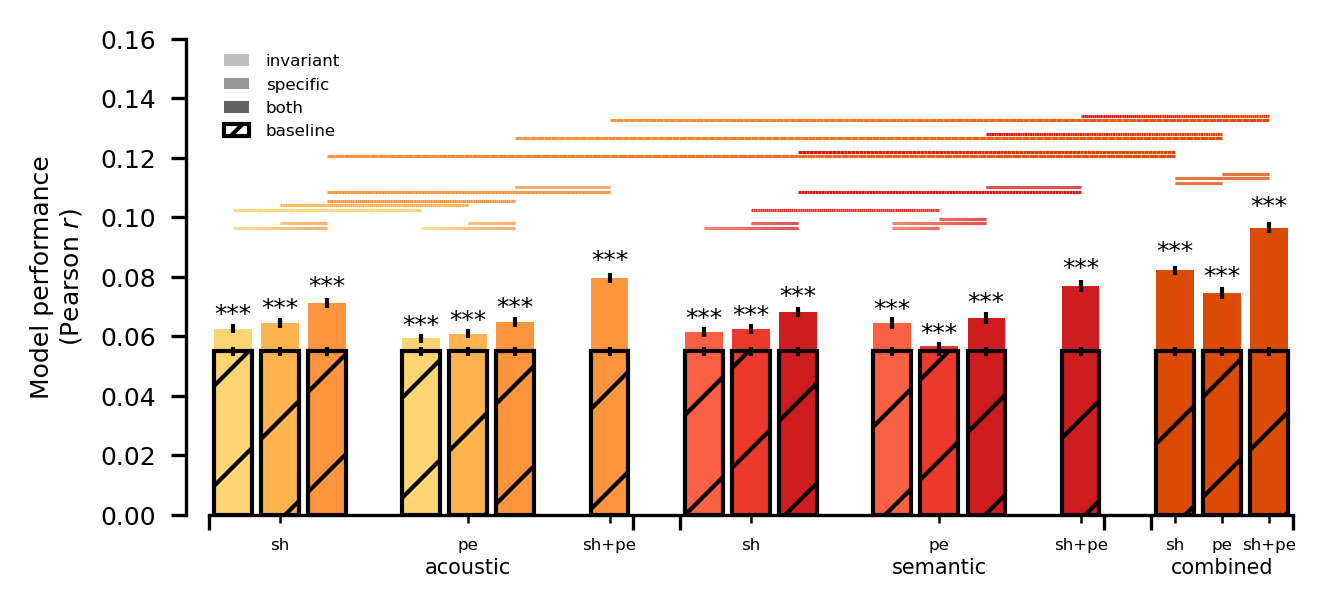

In [12]:
'''
Figure 8
'''

import matplotlib.collections as mcoll

C1 = pub.colours.equidistant('YlOrRd', k = 20)
C2 = pub.colours.equidistant('Reds', k = 20)
C3 = pub.colours.equidistant('Oranges', k = 20)
cols_inv = [C1[5], C2[10], C3[10]]
cols_spc = [C1[7], C2[12], C3[12]]
cols_bot = [C1[9], C2[14], C3[14]]

# set labels
labs = [
    'baseline',
    'acc.inv. (sh)',
    'acc.spc. (sh)',
    'acc.bth. (sh)',
    'acc.inv. (pe)',
    'acc.spc. (pe)',
    'acc.bth. (pe)',
    'acc.bth. (sh+pe)',
    'sem.inv. (sh)',
    'sem.spc. (sh)',
    'sem.bth. (sh)',
    'sem.inv. (pe)',
    'sem.spc. (pe)',
    'sem.bth. (pe)',
    'sem.bth. (sh+pe)',
    'acc.sem. (sh)',
    'acc.sem. (pe)',
    'acc.sem. (sh+pe)'
]

# add baseline tests
tests = [(0, i) for i in range(1, oos_r.shape[1])]
tests += [
    # within acc.sh.
    0,
    (1, 2), (1, 3), (2, 3),
    # within acc.pe.,
    0,
    (4, 5), (4, 6), (5, 6),
    # between acc.sh.acc.pe.,
    4,
    (1, 4), (2, 5), (3, 6),
    # between acc.sh both,
    8,
    (3, 7), (6, 7),
    
    # within sem.sh.
    0,
    (8, 9), (8, 10), (9, 10),
    # within sem.pe.,
    0,
    (11, 12), (11, 13), (12, 13),
    # between sem.sh.sem.pe.,
    4,
    (8, 11), (9, 12), (10, 13),
    # between sem.sh both,
    8,
    (10, 14), (13, 14),
    
    # acoustic v sem (sh & pe)
    12,
    (3, 10), (6, 13),
    # acoustic v sem (all)
    (7, 14),
    
    # combined sharpening
    16,
    (3, 15), (10, 15),
    
    # combined pe
    20,
    (6, 16), (13, 16),
    
    # within combined
    10,
    (15, 16), (15, 17), (16, 17),
    
    # full vs. partials
    24,
    (7, 17), (14, 17)
]

'''
    
    '''

# set colours
colours = [
    cols_inv[0], cols_spc[0], cols_bot[0],
    cols_inv[0], cols_spc[0], cols_bot[0],
    cols_bot[0],
    cols_inv[1], cols_spc[1], cols_bot[1],
    cols_inv[1], cols_spc[1], cols_bot[1],
    cols_bot[1],
    cols_bot[2], cols_bot[2], cols_bot[2]
]

# set placement
placement = [
    0, 1, 2, 
    4, 5, 6,
    8,
    10, 11, 12,
    14, 15, 16,
    18,
    20, 21, 22
]

# setup sig maxes
vmax = oos_r.mean(-1).mean(0).max()
steps = 0.0015
sigs = 0

# setup baseline
base_mu = oos_r[:,0,:].mean()
base_se = oos_r[:,0,:].mean(-1)[np.random.choice(np.arange(oos_r.shape[0]), replace = True, size = (1000, oos_r.shape[0]))]
base_se = base_se.mean(-1).std(0)

# setup figure
fig, ax = pub.figure(figsize = (4.4, 2.0))

# bars
for i in range(1, oos_r.shape[1]):
    subs = oos_r[:,i].mean(-1)

    mu = subs.mean()
    se = subs[np.random.choice(np.arange(subs.shape[0]), replace = True, size = (1000, subs.shape[0]))]
    se = se.mean(-1).std(0)
    x_coord = placement[i - 1]
    col_i = colours[i - 1]
    
    ax.bar(x_coord, mu, color = col_i)
    ax.errorbar(x_coord , mu, yerr = se, color = 'black')

    ax.bar(x_coord, base_mu, color = 'None', hatch = '/', edgecolor = 'black')
    ax.errorbar(x_coord , base_mu, yerr = base_se, color = 'black')

contrasts = []
t_tests = []
df = []
tv = []
cohensd = []
ps = []
mu = []
sd = []
se = []
lb, ub = [], []
pct_mu = []
pct_sd = []
pct_se = []
pct_lb, pct_ub = [], []

for i, test in enumerate(tests):
    if isinstance(test, int) or isinstance(test, np.ndarray): continue
    
    j, k = test
    
    contrasts.append(f'{labs[j]}-{labs[k]}')
    test = scipy.stats.ttest_rel(oos_r[:,j].mean(-1), oos_r[:,k].mean(-1))
    t_tests.append(test)
    df.append(test.df)
    tv.append(test.statistic)
    cohensd.append(rsa.stats.cohens_d(oos_r[:,j].mean(-1), oos_r[:,k].mean(-1), paired = True).squeeze())
    ps.append(test.pvalue)
                   
    diff = oos_r[:,j].mean(-1) - oos_r[:,k].mean(-1)
    se_i = rsa.stats.bootstrap_se(diff)
    mu.append(diff.mean())
    sd.append(diff.std())
    se.append(se_i)
    lb.append(diff.mean() - 1.96 * se_i)
    ub.append(diff.mean() + 1.96 * se_i)
    
    diff = ((oos_r[:,j].mean(-1) / oos_r[:,k].mean(-1)) - 1) * 100
    se_i = rsa.stats.bootstrap_se(diff)
    pct_mu.append(diff.mean())
    pct_sd.append(diff.std())
    pct_se.append(se_i)
    pct_lb.append(diff.mean() - 1.96 * se_i)
    pct_ub.append(diff.mean() + 1.96 * se_i)

ps_unc = np.array(ps)
ps = rsa.stats.bonferroni_holm(ps_unc)

i_c = 0
for i, test in enumerate(tests):
    if isinstance(test, int):
        sigs = test
        i_c += 1
        continue
    
    j, k = test
    p = ps[i - i_c]

    if 0 in [j, k]:
        k = max(j, k)
        coord_x = placement[k - 1]
        
        sig = '***' if p < 1e-3 else '**' if p < 1e-2 else '*' if p <= 5e-2 else 'n.s.'
        ax.annotate(sig, xy = (0, 0), xytext = (coord_x, 1.075 * oos_r[:,k].mean(-1).mean(0)), ha = 'center', va = 'center')
    else:
        c_x = placement[j - 1]
        c_y = placement[k - 1]
        col_x = colours[j - 1]
        col_y = colours[k - 1]
        
        if p < .05:
            x_interp = np.linspace(c_x, c_y, 100)
            y_interp = np.array([vmax + sigs * steps] * x_interp.shape[0])
            c_interp = np.linspace(col_x, col_y, 100)
            pos = np.array([x_interp, y_interp]).T.reshape(-1, 1, 2)
            pos = np.concatenate([pos[:-1], pos[1:]], axis = 1)
            
            lc = mcoll.LineCollection(pos, colors = c_interp, linewidth = 0.75)
            ax.add_collection(lc)
            
            sigs += 1

# add legend
ax.bar(-10, -10, color = C[18], label = 'invariant')
ax.bar(-10, -10, color = C[17], label = 'specific')
ax.bar(-10, -10, color = C[16], label = 'both')
ax.bar(-10, -10, color = 'white', hatch = '/', edgecolor = 'black', label = 'baseline')

ax.set_xlim([-0.5, 22.5])
ax.set_ylabel('Model performance\n' + r'(Pearson $r$)')
ax.set_ylim([0, 0.16])
ax.set_yticks(np.arange(0.0, 0.161, 0.02))

ax.spines['left'].set_position(('data', -1.0))

leg = pub.cosmetics.legend(ax = ax, loc = 'upper left', ncol = 1, prop = {'size': 4})

for handle, text in zip(leg.legendHandles, leg.texts):
    if text.get_text() == "baseline":
        handle.set_hatch("///")

ax.set_xticks([-0.5, 8.5, 9.5, 18.5, 19.5, 22.5], [], minor = False)
ax.set_xticks([1, 5, 8, 11, 15, 18, 20, 21, 22], ['sh', 'pe', 'sh+pe', 'sh', 'pe', 'sh+pe', 'sh', 'pe', 'sh+pe'], minor = True, fontsize = 4)
ax.annotate('acoustic', xy = (0, 0), xytext = (5.0, -0.0175), ha = 'center', va = 'center', fontsize = 5, annotation_clip = False)
ax.annotate('semantic', xy = (0, 0), xytext = (15.0, -0.0175), ha = 'center', va = 'center', fontsize = 5, annotation_clip = False)
ax.annotate('combined', xy = (0, 0), xytext = (21.0, -0.0175), ha = 'center', va = 'center', fontsize = 5, annotation_clip = False)

pub.cosmetics.finish()

fig.savefig(f'./figures/png/suppfig8_bw-rsa-restricted.png', dpi = 800)
fig.savefig(f'./figures/svg/suppfig8_bw-rsa-restricted.svg')
fig.savefig(f'./figures/pdf/suppfig8_bw-rsa-restricted.pdf')

dpi = 300  # any value; inches = pixels / dpi

fig.savefig(
    f'./figures/tiff/suppfig8_bw-rsa-restricted.tiff',
    dpi=dpi,
    format="tiff",
    # needs Matplotlib >=3.7 for pil_kwargs
    pil_kwargs={"compression": "tiff_lzw"}  # or "tiff_adobe_deflate", "raw"
)

In [13]:
'''
Table 8
'''

fmt = {
    'M':        '{:.3f}'.format,
    'Std. Dev': '{:.3f}'.format,
    't-value':  '{:.2f}'.format,
    'p-value':  '{:.1e}'.format,  # scientific notation, shorter
}

df = {'contrast': contrasts, 'M': mu, 'Std. Dev': sd, 'df': df, 't-value': tv, 'p-value': ps}
df = pd.DataFrame.from_dict(df)

latex = df.to_latex(
    index=False,
    formatters=fmt,
    # make first col a paragraph column that wraps
    column_format='>{\\raggedright\\arraybackslash}p{0.40\\linewidth}rrrrr',
    escape=False
)

print(latex)

\begin{tabular}{>{\raggedright\arraybackslash}p{0.40\linewidth}rrrrr}
\toprule
                         contrast &      M & Std. Dev &  df & t-value & p-value \\
\midrule
           baseline-acc.inv. (sh) & -0.008 &    0.004 &  34 &  -11.22 & 1.7e-11 \\
           baseline-acc.spc. (sh) & -0.010 &    0.004 &  34 &  -13.44 & 1.3e-13 \\
           baseline-acc.bth. (sh) & -0.016 &    0.005 &  34 &  -20.10 & 8.8e-19 \\
           baseline-acc.inv. (pe) & -0.004 &    0.002 &  34 &  -10.74 & 5.3e-11 \\
           baseline-acc.spc. (pe) & -0.006 &    0.004 &  34 &   -9.82 & 4.9e-10 \\
           baseline-acc.bth. (pe) & -0.010 &    0.004 &  34 &  -16.20 & 5.9e-16 \\
        baseline-acc.bth. (sh+pe) & -0.025 &    0.005 &  34 &  -26.22 & 1.9e-22 \\
           baseline-sem.inv. (sh) & -0.006 &    0.003 &  34 &  -11.09 & 2.3e-11 \\
           baseline-sem.spc. (sh) & -0.007 &    0.006 &  34 &   -7.60 & 1.3e-07 \\
           baseline-sem.bth. (sh) & -0.013 &    0.006 &  34 &  -13.60 & 9.6e-14 \\

/var/folders/b4/qysvl6jd4995kp_qql3yj3880000gn/T/ipykernel_71763/3040603472.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex = df.to_latex(
